# Lab: Cleaning numerical data
_Week 1 - Day 4 - Morning_

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives:**
- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions
1. Import the necessary libraries.
1. Load the customer_value_analysis.csv into the variable customer_df.
1. First look at its main features (head, shape, info).
1. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
1. Change the type of effective_to_date column to DateTime format.
1. Check NaN values per column.
1. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
1. Drop any ID column.
1. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
1. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
1. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
1. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
1. According to the previous histogram plots, do you think that you will have to apply any transformation?
1. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
display(customer_df.shape)
display(customer_df.dtypes)

(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Stantardize columns and clean data

### Columns

In [5]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # If there is "unnamed: 0" column use (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    #df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [6]:
customer_df = clean_columns(customer_df)

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Missing values

In [8]:
customer_df.isnull().sum()/len(customer_df) # proportion of missing values per column in the dataframe

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

## Split variables: numerical&categorical
- Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [13]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

In [16]:
numerical_df, categorical_df = var_types_split(customer_df)

In [18]:
display(numerical_df.head())
display(categorical_df.head())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Remove ID columns

In [21]:
categorical_df.drop('customer', axis=1, inplace=True)

In [22]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Numerical columns
Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
- Not sure I understand the variable "monthly_premium_auto" and I cannot find the file with the explanation but:
- Total claim amount is positively correlated with monthly premium auto, which make sense because those people spending more money on their policies will be entitled to higher claims.

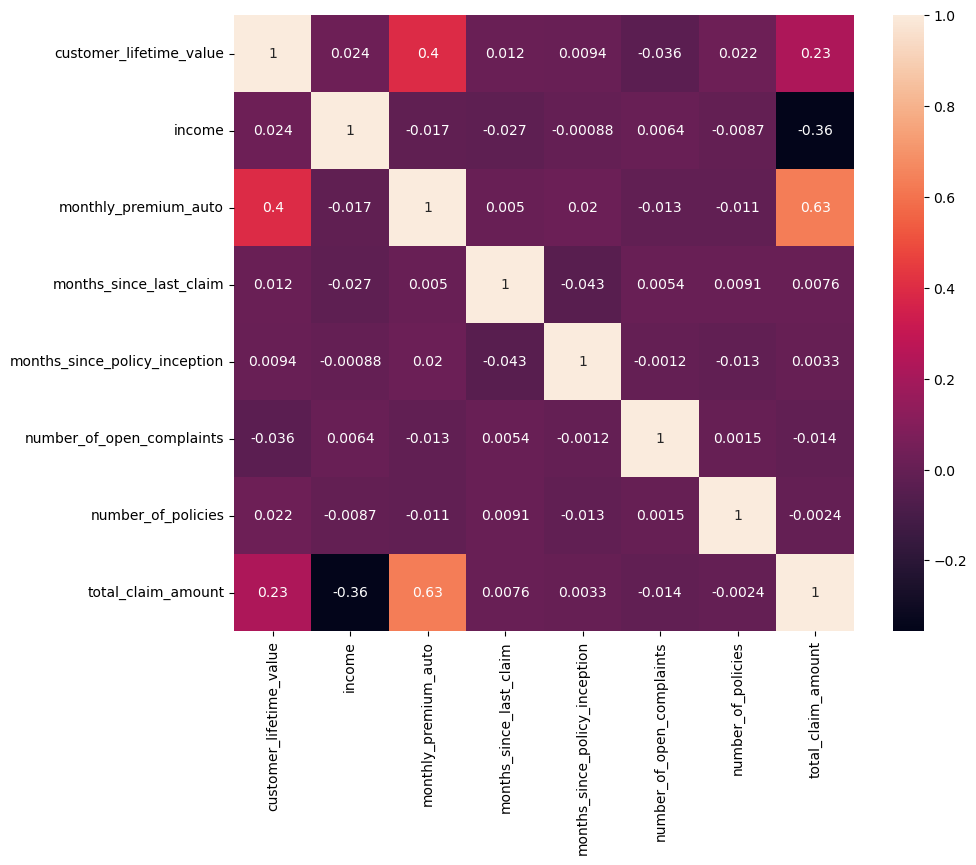

In [23]:
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [35]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

In [50]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [53]:
continuous_df, discrete_df = numerical_split(numerical_df)

In [54]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [55]:
display(discrete_df['months_since_last_claim'].nunique())
display(discrete_df['number_of_open_complaints'].nunique())
display(discrete_df['number_of_policies'].nunique())

36

6

9

In [56]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [57]:
display(continuous_df['customer_lifetime_value'].nunique())
display(continuous_df['income'].nunique())
display(continuous_df['monthly_premium_auto'].nunique())
display(continuous_df['months_since_policy_inception'].nunique())
display(continuous_df['total_claim_amount'].nunique())

8041

5694

202

100

5106

## Plots

### Discrete
Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

Comment: I have created 2 functions. One simpler and a second one with subplots.

In [97]:
# first function
def plot_discrete1(df):
    columns = df.columns
    
    for col in columns:
        #fig=plt.figure(figsize=(16,16)) # fi we want each single plot to have that size
        sns.countplot(data = df, x = df[col])
        plt.show()
            
#def plot_distributions(df):
 #   num_cols = df.columns.tolist()
    
  #  for col in num_cols:
   #     sns.countplot(data=df, x=col)
    #    plt.show()

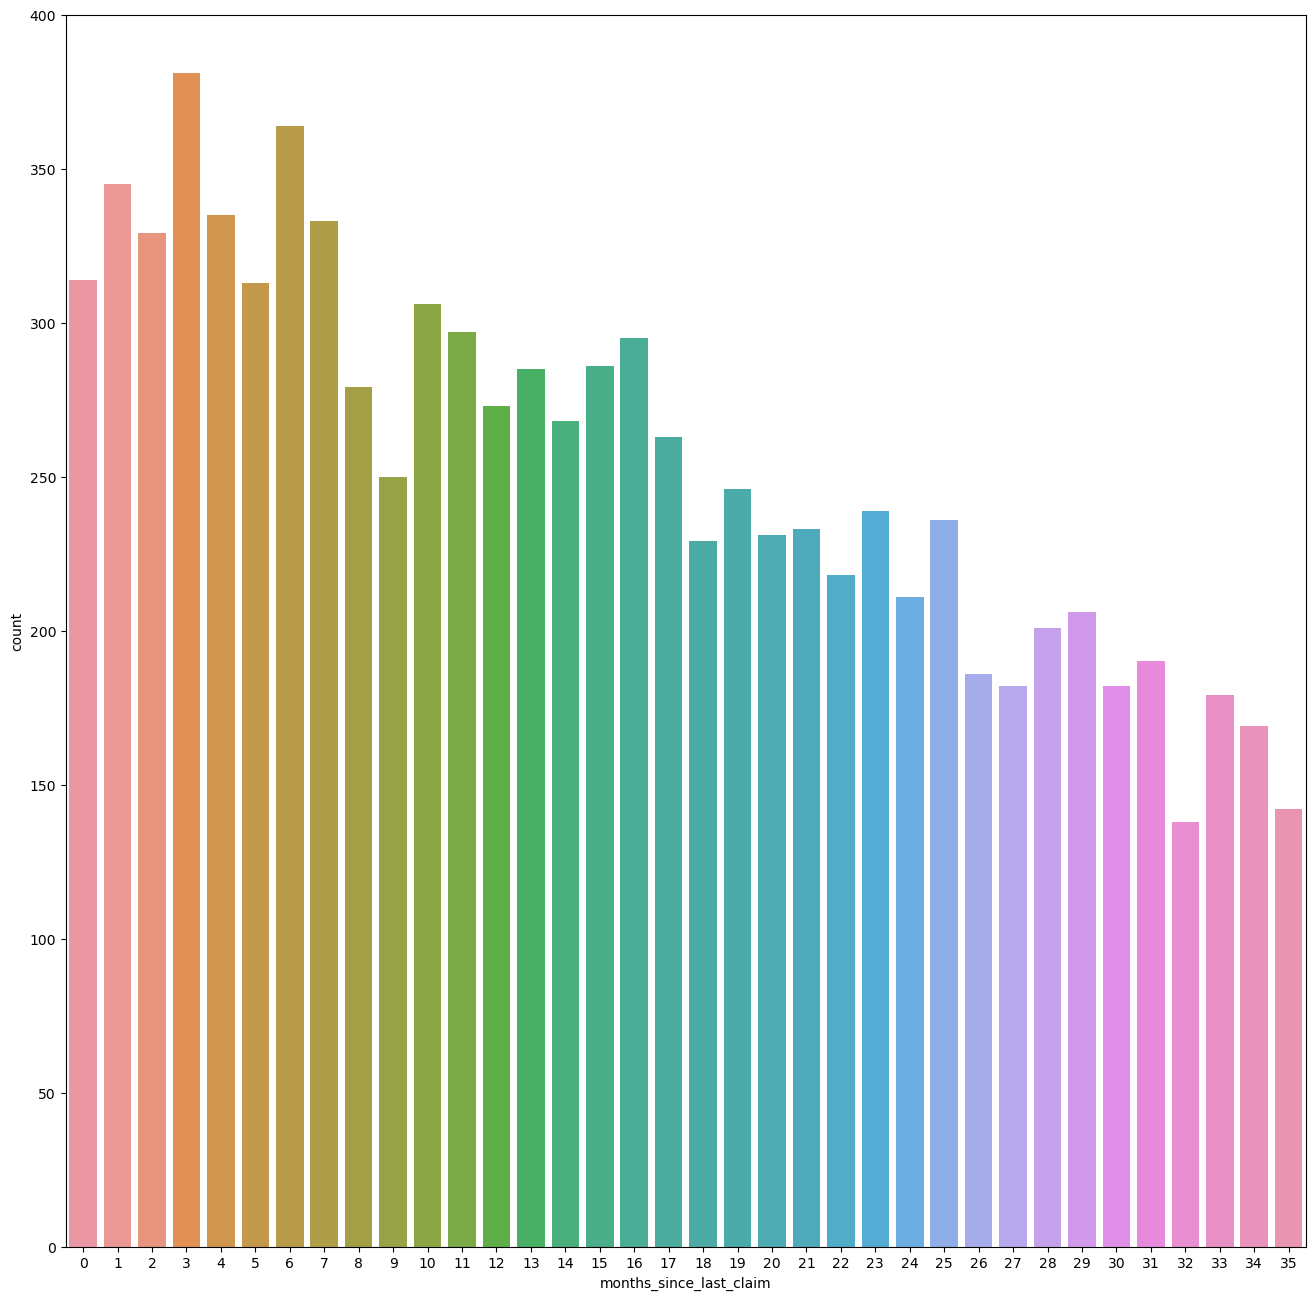

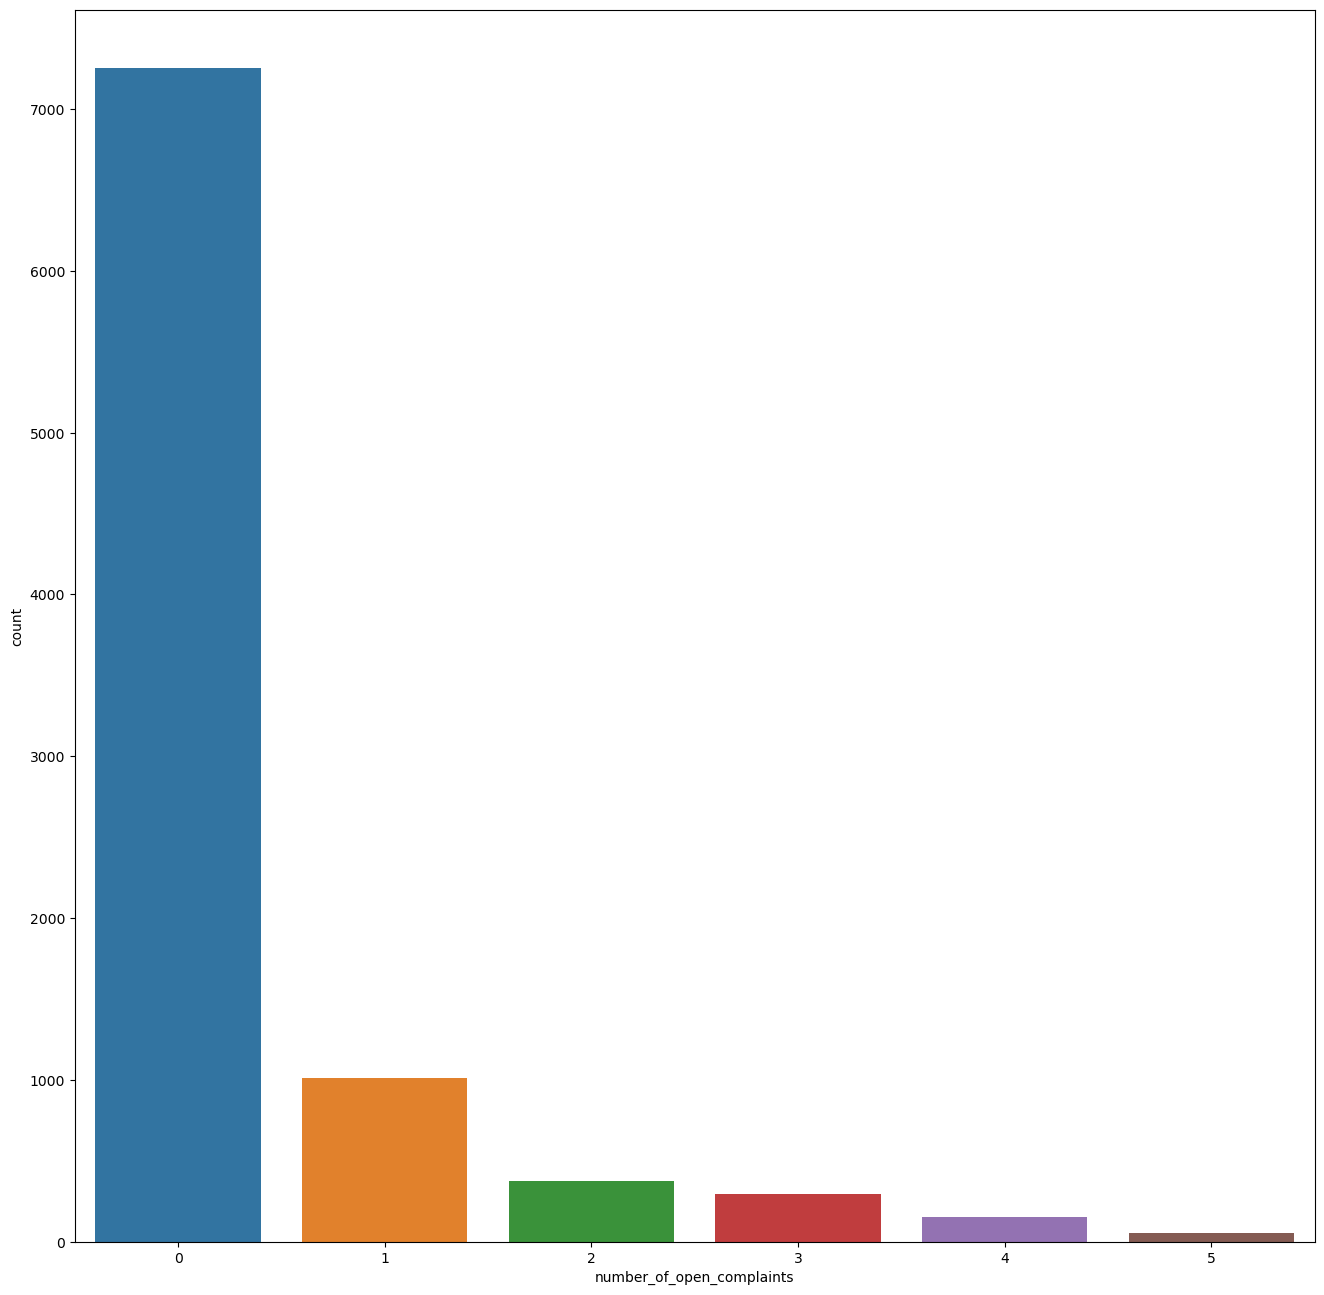

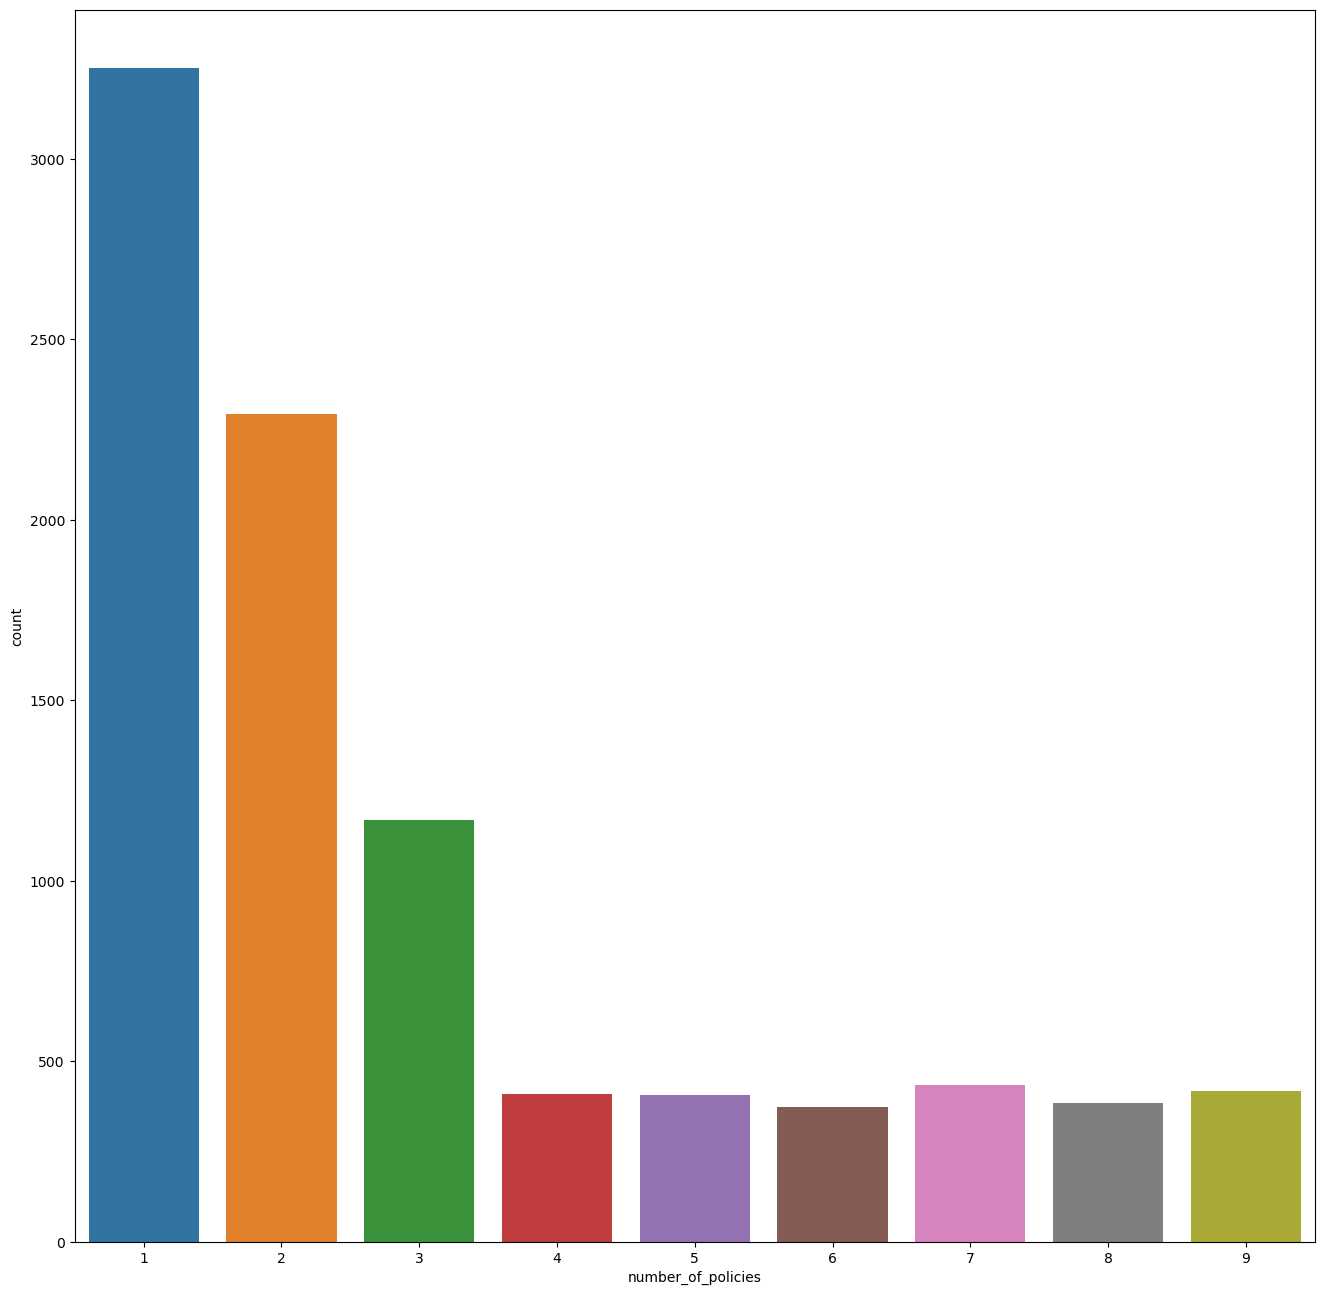

In [98]:
plot_discrete1(discrete_df)

In [105]:
# second function
def plot_discrete2(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df)
    plt.tight_layout()
    plt.show()


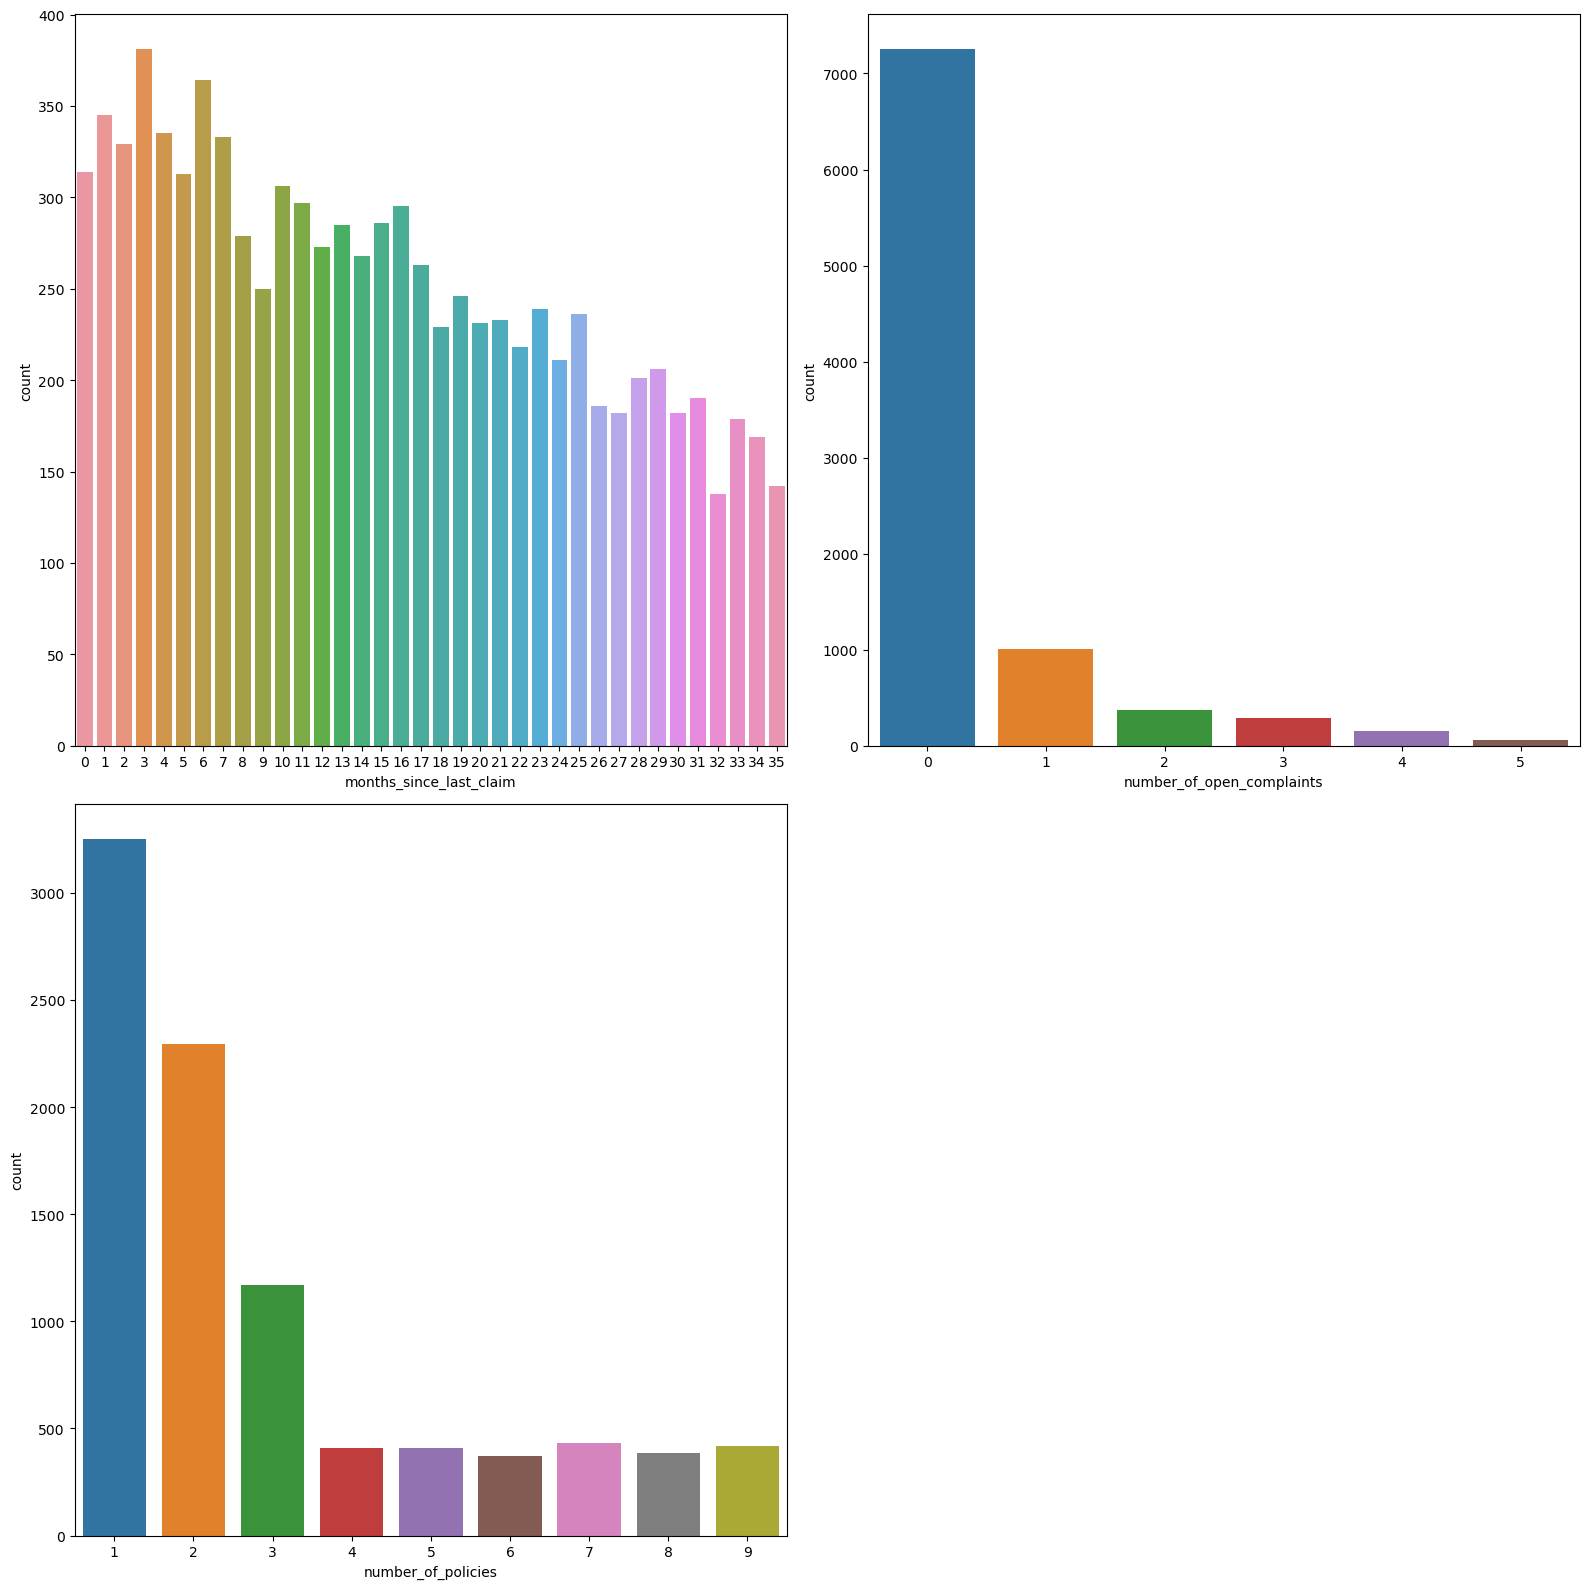

In [106]:
plot_discrete2(discrete_df)

### Continuous
Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [109]:
def plot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

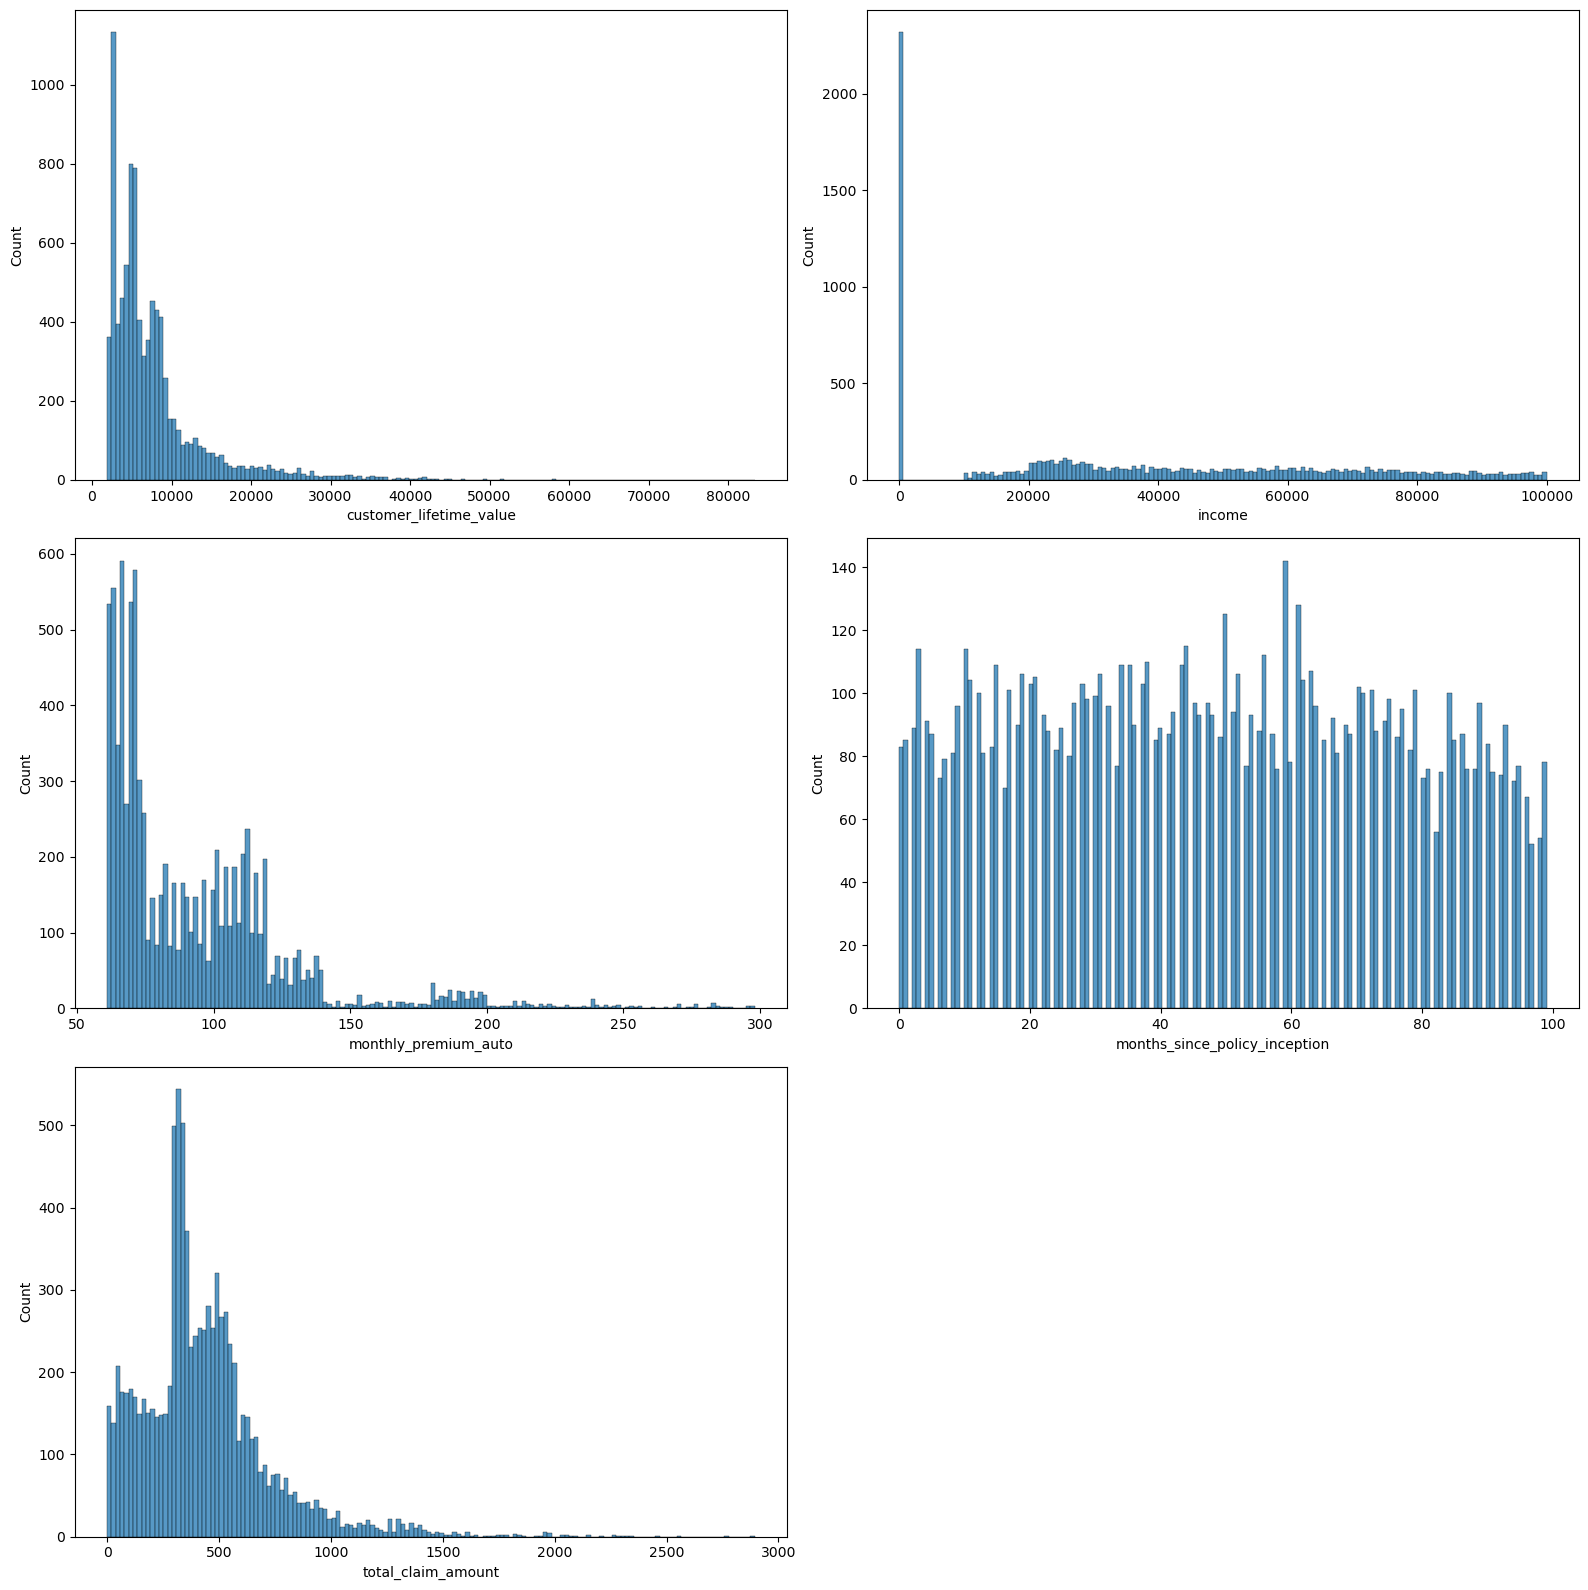

In [110]:
plot_continuous(continuous_df)

According to the previous histogram plots, do you think that you will have to apply any transformation?
- Transformations need to be applied both in discrete and in continuous numerical variables. Some variables are heavily skewed (like, for example, customer_lifetime_value or monthly_premium_auto), don't follow a normal distribution (like, for example, months_since_policy_inception), there's class imbalance (number_of policies).
- On top of that, some variables contain a lot of zeros, which might be interesting to analize separately.

## Outliers
Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df

In [114]:
def boxplot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

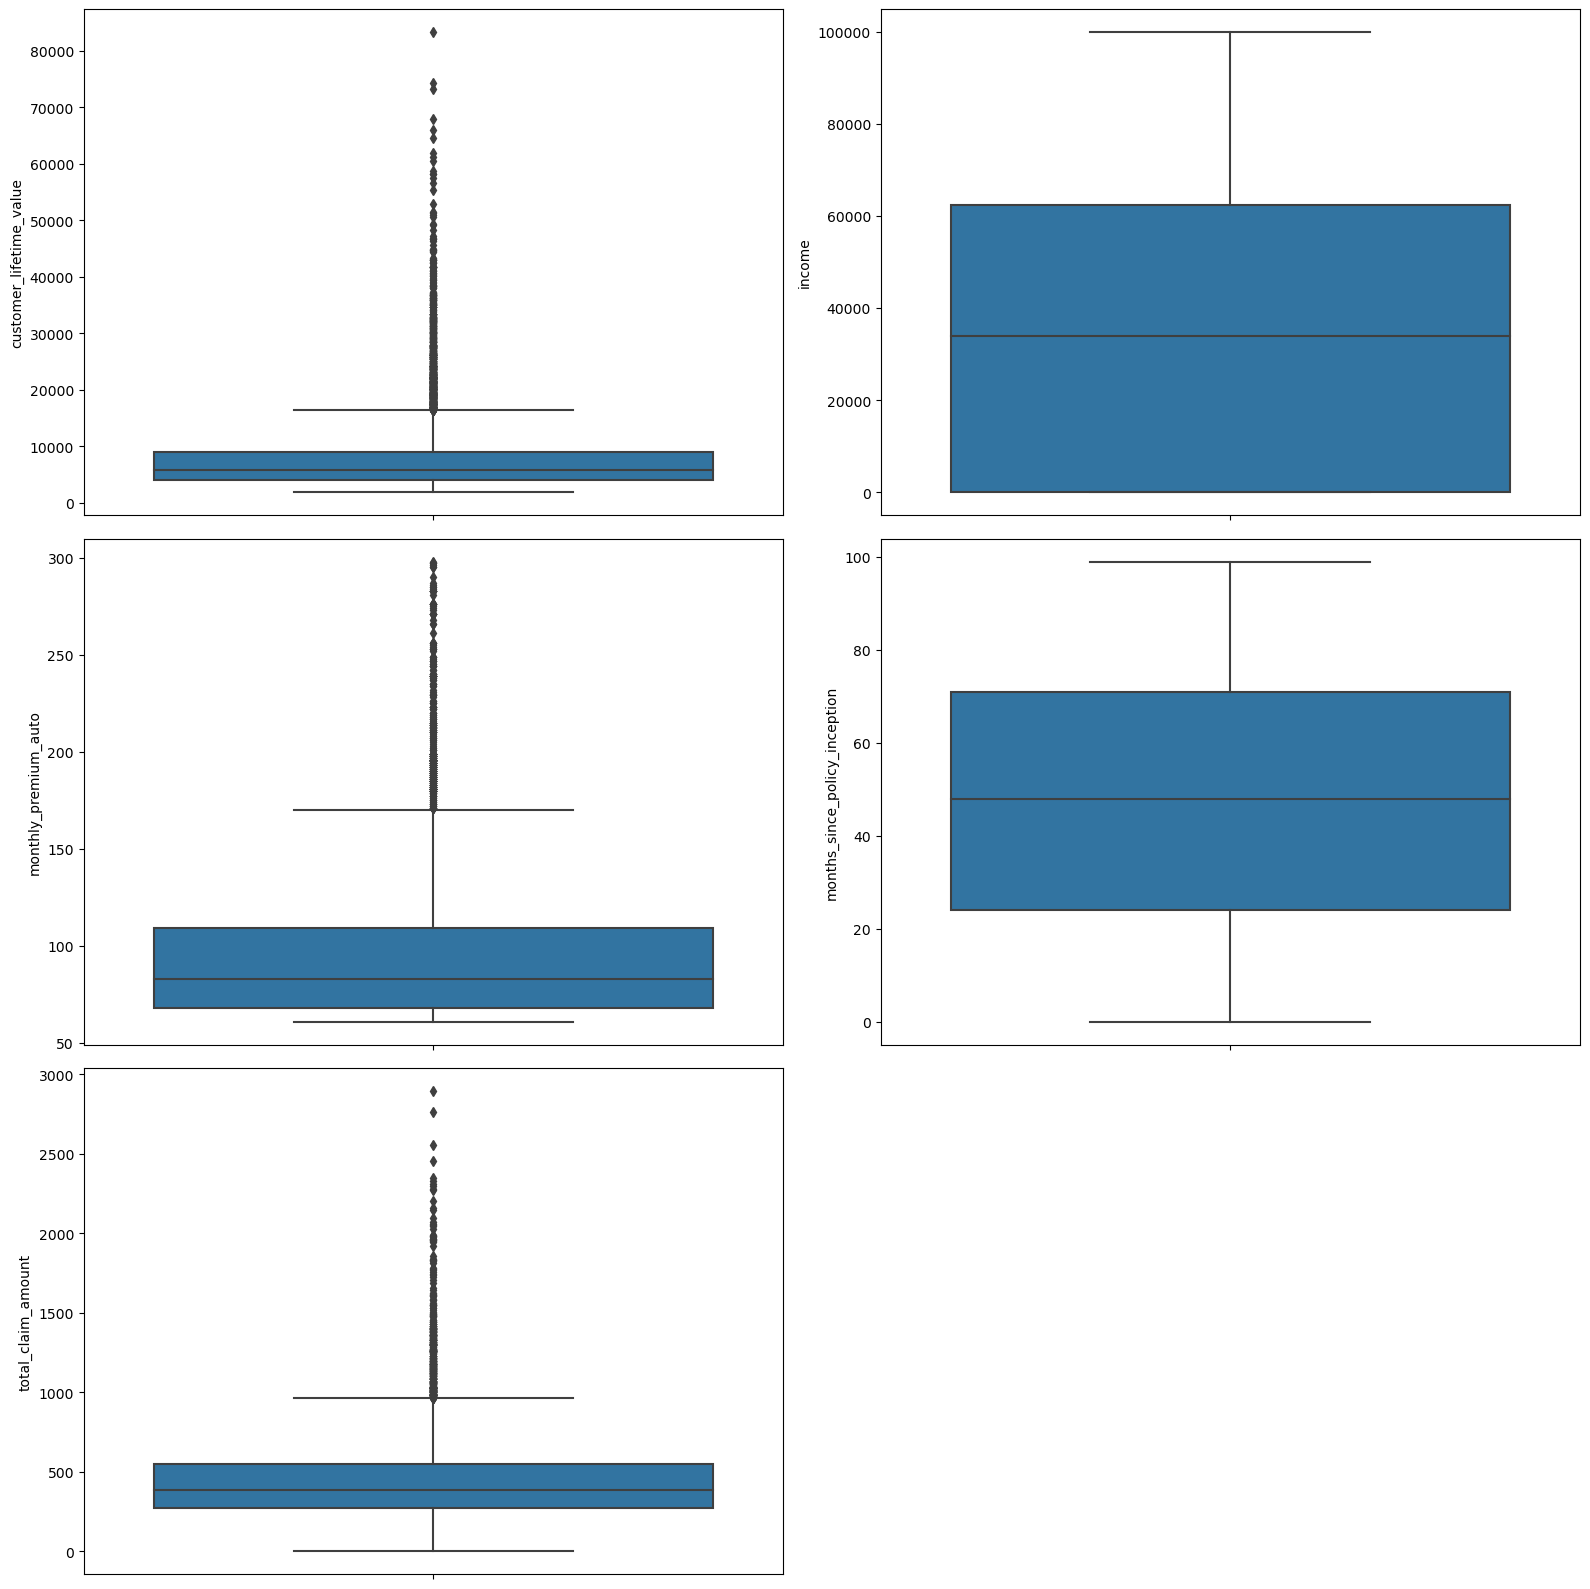

In [115]:
boxplot_continuous(continuous_df)